# Suite logistique et chaos

On appelle $(c_n)_{n\in \mathbb{N}}$ la suite logistique définie par $c_0 \in [0, 1]$, un paramètre $r \in [0, 4]$ et : 
$$c_{n+1} = rc_n(1-c_n)$$

Remarquons que si $c_0=0$ ou $c_0=1$ alors on obtient une suite constante égale à 0.

## Questions
1. Ecrire une fonction qui génère $n$ itérations de la suite logistique pour un paramètre $r$ fixé.
2. Ecrire une fonction qui visualise les évolutions de la suite logistique pour plusieurs paramètres $r$.
3. Commenter.

Puisque nous avons à choisir à la fois $r$ et $c_0$, nous décidons d'écrire une fonction qui nous renverra une initialisation aléatoire. 

In [1]:
import numpy as np


def random_initialisation(low=0, high=1):
    start = np.random.uniform(low=low, high=high)
    while start == 0 or start == 1:
        start = np.random.uniform(low=low, high=high)
    return start

Nous pouvons à présent traiter la première question sur la génération des $n$ premiers termes de la suite logistique pour un paramètre $r$ et un premier terme fixé. 
Il est fréquent d'avoir des suites définies par récurrences qui peuvent s'écrire sous la forme :
$$u_{n+1} = f(u_n)$$

Avec $f$ une fonction. C'est bien notre cas, donc nous allons écrire une fonction qui permet de répondre à la première question pour l'ensemble des suites définies de cette manière.

In [2]:
def sequence_generator(function, iteration, initial_value=None, low=0, high=1):
    start = initial_value if initial_value != None else random_initialisation(low=low, high=high)
    sequence = [start]

    for index in range(1, iteration):
        sequence.append(function(sequence[index-1]))
    
    return sequence

Voyons sur notre exemple les 10 premiers termes :

In [3]:
r = 0.8
logistic = lambda x: r * x * (1 -x)

sequence = sequence_generator(logistic, 10)

for index in range(len(sequence)):
    print("%d : %0.2f" % (index, sequence[index]))

0 : 0.51
1 : 0.20
2 : 0.13
3 : 0.09
4 : 0.07
5 : 0.05
6 : 0.04
7 : 0.03
8 : 0.02
9 : 0.02


Il semblerait que l'on ait une convergence vers 0 pour $r=0.8$. Répondons à la deuxième question pour être capable d'apprécier plus rapidement les évolutions de la suite logistique.
A nouveau, travaillons dans le cadre général défini plus tôt. Commençons par visualiser l'évolution de la suite en prenant pour abscisses les itérations de la suite.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks")


def plot_sequence(sequence, show=True, title="Sequence evolution"):
    abscissa = [iteration for iteration in range(len(sequence))]
    
    plt.plot(abscissa, sequence, 'o-', c="blue")

    plt.title(title)
    sns.despine()
    
    if show:
        plt.show()

Et sur notre exemple :

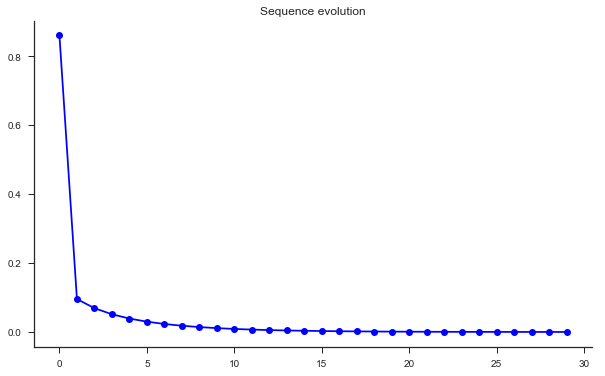

In [5]:
r = 0.8
logistic = lambda x: r * x * (1 -x)

sequence = sequence_generator(logistic, 30)


plt.figure(figsize=(10, 6))
plot_sequence(sequence)

Une autre manière de visualiser une suite définie par une fonction est d'avoir l'évolution de la suite avec la fonction.
Autrement dit, on veut visualiser la ligne brisée $(c_0, c_0) \rightarrow (c_0, f(c_0)) \rightarrow (c_1, c_1) \rightarrow (c_1, f(c_1)) \rightarrow \ldots$

On peut la réécrire comme : $(c_0, c_0) \rightarrow (c_0, c_1) \rightarrow (c_1, c_1) \rightarrow (c_1, c_2) \rightarrow \ldots$ et on comprend alors qu'il va falloir *doubler* la sequence initiale pour obtenir cette nouvelle séquence.

In [6]:
def double_vector(vector):
    doubled_vector = []
    
    for i in range(len(vector)):
        doubled_vector.extend([vector[i], vector[i]])
    
    return doubled_vector[:2*len(vector)-1], doubled_vector[1:]

Visualisons sur un petit nombre d'itération ce que fait cette fonction : 

In [7]:
r =  0.8
logistic = lambda x: r * x * (1 -x)

sequence = sequence_generator(logistic, 3)
X, Y = double_vector(sequence)

for x, y in zip(X, Y):
    print("(%0.4f, %0.4f)" % (x, y))

(0.3544, 0.3544)
(0.3544, 0.1830)
(0.1830, 0.1830)
(0.1830, 0.1196)
(0.1196, 0.1196)


Cela fait exactement ce que l'on souhaitais ! Il ne reste plus qu'à écrire la fonction.

In [8]:
def plot_recurrence(function, sequence, show=True, title="Sequence value"):
    x = np.linspace(0, 1, 100)

    plt.plot(x, x, c="red")
    plt.plot(x, logistic(x), c="blue")

    X, Y = double_vector(sequence)
    
    plt.plot(X, Y, c="black")
    plt.title(title)
    sns.despine()
    if show:
        plt.show()

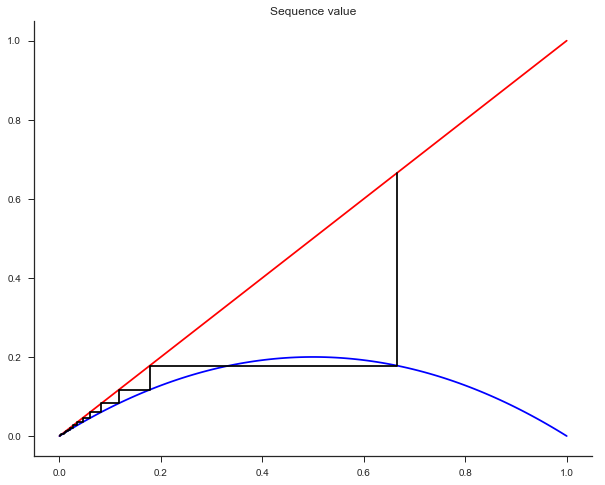

In [9]:
r =  0.8
logistic = lambda x: r * x * (1 -x)

sequence = sequence_generator(logistic, 30)


plt.figure(figsize=(10, 8))
plot_recurrence(logistic, sequence)

Pour mieux voir la fonction, faisons une unique fonction :

In [10]:
def visualize_sequence(function, sequence):    
    plt.subplot(1, 2, 1)
    plot_sequence(sequence, show=False)
    
    plt.subplot(1, 2, 2)
    plot_recurrence(function, sequence, show=False)
    
    plt.show()

Et sur notre exemple : 

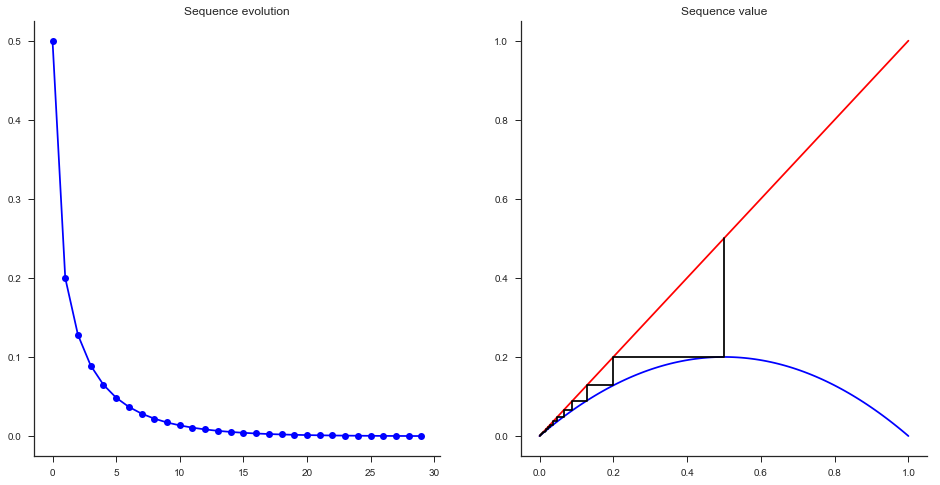

In [11]:
r =  0.8
logistic = lambda x: r * x * (1 -x)

sequence = sequence_generator(logistic, 30, initial_value=0.5)

plt.figure(figsize=(16, 8))
visualize_sequence(logistic, sequence)


Jusqu'ici nous n'avons pas comparer pour différente valeurs du paramètres $r$. Regardons :

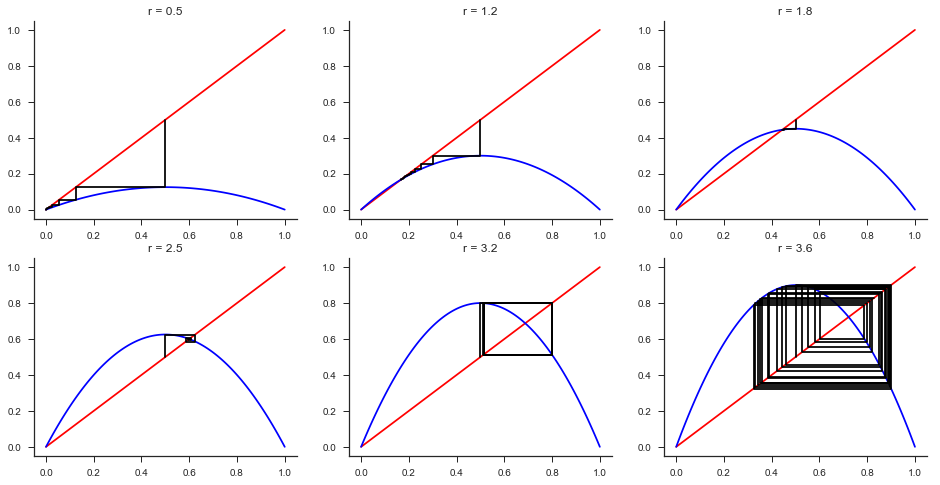

In [12]:
plt.figure(figsize=(16, 8))

index = 1
r_values = [0.5, 1.2, 1.8, 2.5, 3.2, 3.6]
for r in r_values:
    logistic = lambda x: r * x * (1 -x)
    sequence = sequence_generator(logistic, 30, initial_value=0.5)
    
    plt.subplot(2, 3, index)
    plot_recurrence(logistic, sequence, show=False, title="r = %0.1f" % r)
    
    index += 1

plt.show()

C'est très étonnant ! Le comportement limite de la suite logistique change fortement en fonction du paramètre $r$. Pour $r=0.5$ il converge vers 0, pour $r=1.2$, $r=1.8$ et $r=2.5$ il semble également y avoir convergence mais vers des valeurs différentes. Pour $r=3.2$ il n'y a plus convergence mais oscillation entre deux valeurs limite.
En revanche pour $r=3.6$ nous n'avons pas assez d'itérations pour statuer sur une convergence ou non. Le comportement semble beaucoup plus chaotique.

## Question
Proposer une visualisation du changement de comportement limite de la suite logistique en fonction du paramètre $r$.

Nous allons donc devoir être capable de *calculer* la limite de la suite logistique pour plusieurs valeurs du paramètre $r$. On suppose que cette limite ne dépend pas de l'initialisation. 

Pour accélérer les calculs, nous allons générer une réalisation de la suite avec un grand nombre de réalisations, mais n'afficher que les derniers points. Ainsi, si il y a plusieurs *limites* elles apparaîtrons toutes !

In [13]:
def plot_feigenbaum_tree(r_iteration, initialisation=100, depth=200):
    r_values = np.linspace(0, 4, r_iteration)
    for r in r_values:
        logistic = lambda x: r * x * (1 -x)
        sequence = sequence_generator(logistic, initialisation + depth)
        plt.plot([r] * depth, sequence[-depth:], 'o', markersize=1, c="black", alpha=0.3)
    
    sns.despine()
    plt.xlabel("r values")
    plt.ylabel("Limits observed")
    plt.title("Feigenbaum tree")
    plt.show()

Voyons ce que cela donne sur notre suite logistique :

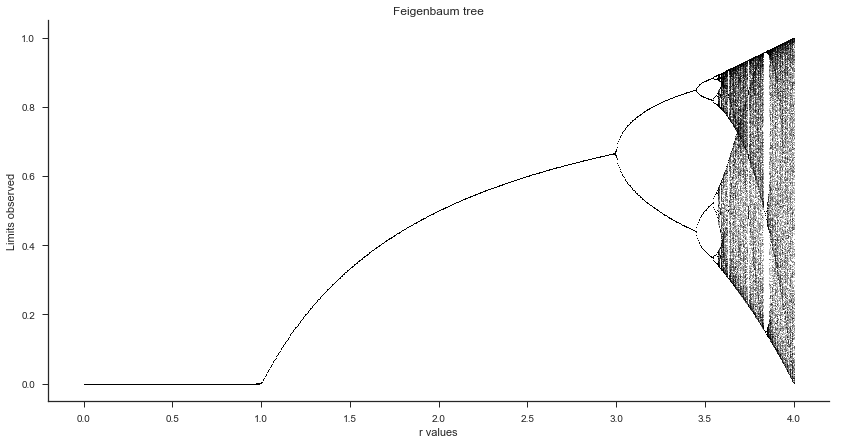

In [14]:
plt.figure(figsize=(14, 7))
plot_feigenbaum_tree(1000, initialisation=250, depth=500)

Nous sommes passé progressivement d'un comportement déterministe vers un comportement parfaitement chaotique.

# Bonus : Quelques résultats mathématiques


On peut montrer que pour $r \in [0, 1]$, $(c_n)_{n\in \mathbb{N}}$ tend vers 0. Pour le faire, on remarque que pour $r=0$ c'est évident, puis on montre que pour $r\in ]0, 1[$ on a : $$\forall x\in[0, 1], \; 0 \leqslant f_r^n(x) \leqslant \frac{r^n}{4}$$ 
En notant $f_r(x) = rx(1-x)$ et $f^n$ correspond à la fonction $f$ composée avec elle-même $n$ fois.

Pour le cas $r=1$, on exploite le résultat sur la convergence vers un point fixe de la fonction qui définie une suite récurrente sous la forme $u_{n+1}=f(u_n)$.

Lorsque $r\in [1, 3]$, on peut montrer que la limite est $1 - \frac{1}{r}$ en travaillant sur l'attractivité des points fixe de la fonction $f_r$. On peut même trouver une forme explicite de la suite quand $r=2$ :
$$ \forall c_0 \in [0, 1], \, \forall n\in \mathbb{N}, \; c_n = \frac{1}{2} - \frac{1}{2}(1 - 2c_0)^{2^n}$$

On observe des dédoublements à partir de $r=3$, et nous avons la possibilités d'identifier les deux *limites*. En pratique nous pouvons écrire l'ensemble des limites qui se succéderons mais cela nécessite énormément de calcul non nécessaire. 

Lorsque $r=4$, nous avons à nouveau une forme explicite :
$$ \forall c_0 \in [0, 1], \, \forall n\in \mathbb{N}, \; c_n = \sin^2(2^nt)$$

Avec $t$ définit comme $c_0 = \sin^2(t)$, d'où la divergence complète observée.